## Корреляция и корреляционный анализ - ДЗ

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# from pylab import rcParams
# rcParams['figure.figsize'] = 13,6

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('water.csv')

## 1 Север и Юг вместе

In [4]:
df.head(5)

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  61 non-null     int64 
 1   location    61 non-null     object
 2   town        61 non-null     object
 3   mortality   61 non-null     int64 
 4   hardness    61 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.5+ KB


## 1.1 График

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

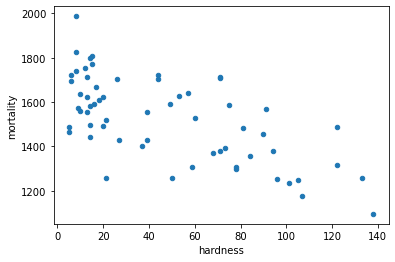

In [5]:
df.plot(kind='scatter', x='hardness', y='mortality')

## 1.2 Пирсон & Синпсон

In [6]:
df[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [7]:
df[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


По графику и коэффициентам корреляции видно, что есть обратная зависимость

## 1.3 Модель линейной регрессии

In [8]:
x = df[['hardness']]
y = df['mortality']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

In [9]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [10]:
print(f"y = {model.coef_[0]} * x + {model.intercept_}")

y = -3.0932129028747344 * x + 1659.7363600462056


In [11]:
y_pred = model.predict(x_test)
y_pred

array([1619.52459231, 1378.25398588, 1399.9064762 , 1622.61780521,
       1616.43137941, 1362.78792137, 1613.3381665 , 1248.33904396,
       1474.14358587, 1409.18611491, 1539.10105683, 1381.34719879,
       1641.17708263, 1539.10105683, 1579.31282457, 1368.97434718,
       1449.39788265, 1433.93181814, 1594.77888909])

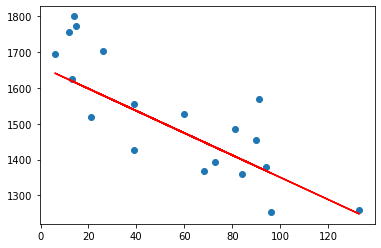

In [12]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, c='r')

## 1.4 Коэффициент детерминации

In [13]:
model.score(x_test, y_test)

0.6387978287782823

Сильно зависит от того, в каких пропорциях разбиваем данные на тестовые

## 1.5 Остатки

<AxesSubplot:xlabel='hardness', ylabel='d_mortality'>

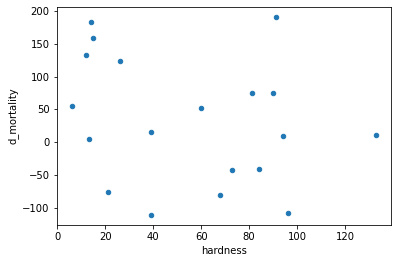

In [14]:
df_2 = pd.DataFrame({'hardness': x_test['hardness'], 'mortality_test': y_test, 'mortality_pred': y_pred})
df_2['d_mortality'] = df_2.apply(lambda r: r.mortality_test - r.mortality_pred, axis=1)
df_2.plot(kind='scatter', x='hardness', y='d_mortality')

Остатки разбросаны выше и ниже нуля

# 2 для серверной части

In [15]:
df_n = df[df.location == 'North']

## 2.1 График

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

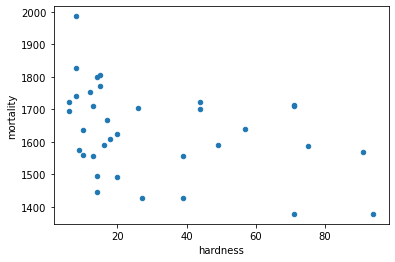

In [16]:
df_n.plot(kind='scatter', x='hardness', y='mortality')

## 2.2 Пирсон & Симпсон

In [17]:
df_n[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.368598
mortality,-0.368598,1.000000


In [18]:
df_n[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


## 2.3 Модель

In [19]:
x = df_n[['hardness']]
y = df_n['mortality']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

In [20]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [21]:
print(f"y = {model.coef_[0]} * x + {model.intercept_}")

y = -1.9523864119182344 * x + 1677.6846937376217


In [22]:
y_pred = model.predict(x_test)
y_pred

array([1648.39889756, 1658.16082962, 1566.39866826, 1638.6369655 ,
       1642.54173832, 1652.30367038, 1582.01775955, 1662.06560244,
       1644.49412474, 1601.54162367, 1539.06525849])

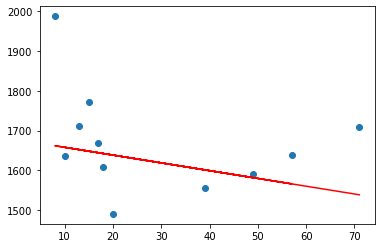

In [23]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, c='r')

## 2.4 Коэффициент детерминации

In [24]:
model.score(x_test, y_test)

-0.07852540806678343

## 2.5 Остатки

<AxesSubplot:xlabel='hardness', ylabel='d_mortality'>

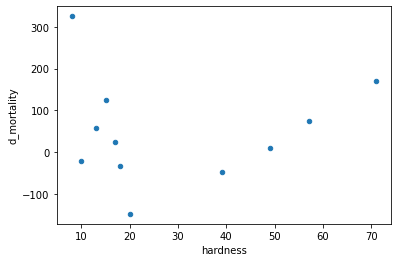

In [25]:
df_2 = pd.DataFrame({'hardness': x_test['hardness'], 'mortality_test': y_test, 'mortality_pred': y_pred})
df_2['d_mortality'] = df_2.apply(lambda r: r.mortality_test - r.mortality_pred, axis=1)
df_2.plot(kind='scatter', x='hardness', y='d_mortality')

# 3 Южная часть

In [26]:
df_n = df[df.location == 'South']

## 3.1 График

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

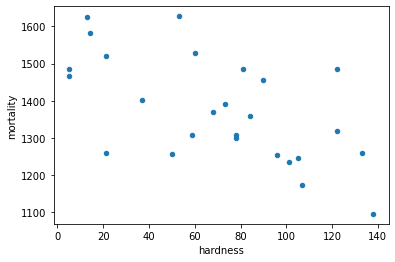

In [27]:
df_n.plot(kind='scatter', x='hardness', y='mortality')

## 3.2 Пирсон & Симпсон

In [28]:
df_n[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


In [29]:
df_n[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


## 3.3 Модель

In [30]:
x = df_n[['hardness']]
y = df_n['mortality']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

In [31]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [32]:
print(f"y = {model.coef_[0]} * x + {model.intercept_}")

y = -1.71882949755679 * x + 1501.2516244544743


In [33]:
y_pred = model.predict(x_test)
y_pred

array([1356.86994666, 1272.64730128, 1478.90684099, 1399.8406841 ,
       1367.18292365, 1362.02643515, 1317.33686822, 1320.77452721])

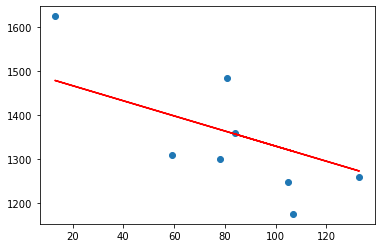

In [34]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, c='r')

## 3.4 Коэффициент детерминации

In [35]:
model.score(x_test, y_test)

0.4897893286483196

## 3.5 Остатки

<AxesSubplot:xlabel='hardness', ylabel='d_mortality'>

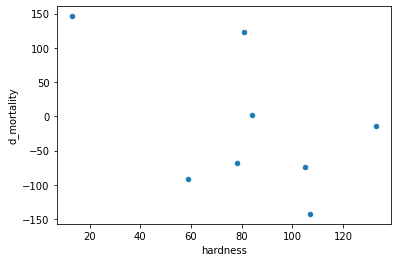

In [36]:
df_2 = pd.DataFrame({'hardness': x_test['hardness'], 'mortality_test': y_test, 'mortality_pred': y_pred})
df_2['d_mortality'] = df_2.apply(lambda r: r.mortality_test - r.mortality_pred, axis=1)
df_2.plot(kind='scatter', x='hardness', y='d_mortality')

**Вывод** При разбитии данных на Север и Юг коэффициент детерминации для каждого случая меняется в диапазонах -1 до ~0.4. Очевидно, это зависит от разбивки данных на данные для обучения и данныя для тестирования.

При этом в общем случае (Север + Юг) всегда больше 0.5.